# **Lab 8.2 Transfer Learning & Hyperparameter Tuning**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.cuda.amp import autocast, GradScaler
import torchvision.models as models
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader,Subset
from torch.utils.tensorboard import SummaryWriter
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

Complete the `load_data()` function that loads the image using `ImageFolder()` with the specific `transforms.compose()` provided below.
`load_data()` will return `DataLoader()` and print the information about the Dataset.
This function must load only a pair of classes from the entire dataset.
Please ensure that the final image is in RGBscale and has a size of 224x224.

`transforms.Compose()` :
- `transforms.Resize()`
- `transforms.ToTensor()`
- `transforms.Pad()`
- `transforms.RandomAffine(degrees=45, translate=(0.1, 0.1),scale=(0.8, 1.2), shear=45)`
- `transforms.Normalize()`

- `transforms.CenterCrop()`

Resource : [`transforms.Compose()`](https://pytorch.org/vision/main/generated/torchvision.transforms.Compose.html#compose), [`torchvision.transforms v1`](<https://pytorch.org/vision/stable/transforms.html#v1-api-reference:~:text=custom)%20tv_tensor%20type.-,V1%20API%20Reference,-Geometry>)

In [ ]:
def load_data(path):
    ### START CODE HERE ###
    train_loader = None
    test_loader = None



    ### END CODE HERE ###

    return train_loader, test_loader

Use your `load_data()` function to load the dataset in the cell below. Then, display the image from the first batch.

<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

```
📃Train Dataset:
	Number of images in class 0: 307
	Number of images in class 1: 305
	Number of images in class 2: 305
	Number of images in class 3: 318
	Number of images in class 4: 316
	Number of images in class 5: 314
	Number of images in class 6: 307
	Number of images in class 7: 305
	Number of images in class 8: 312
	Number of images in class 9: 316
	Number of training samples: 3105

📃Test Dataset:
	Number of images in class 0: 81
	Number of images in class 1: 84
	Number of images in class 2: 84
	Number of images in class 3: 70
	Number of images in class 4: 72
	Number of images in class 5: 74
	Number of images in class 6: 81
	Number of images in class 7: 83
	Number of images in class 8: 76
	Number of images in class 9: 72
	Number of testing samples: 777
```


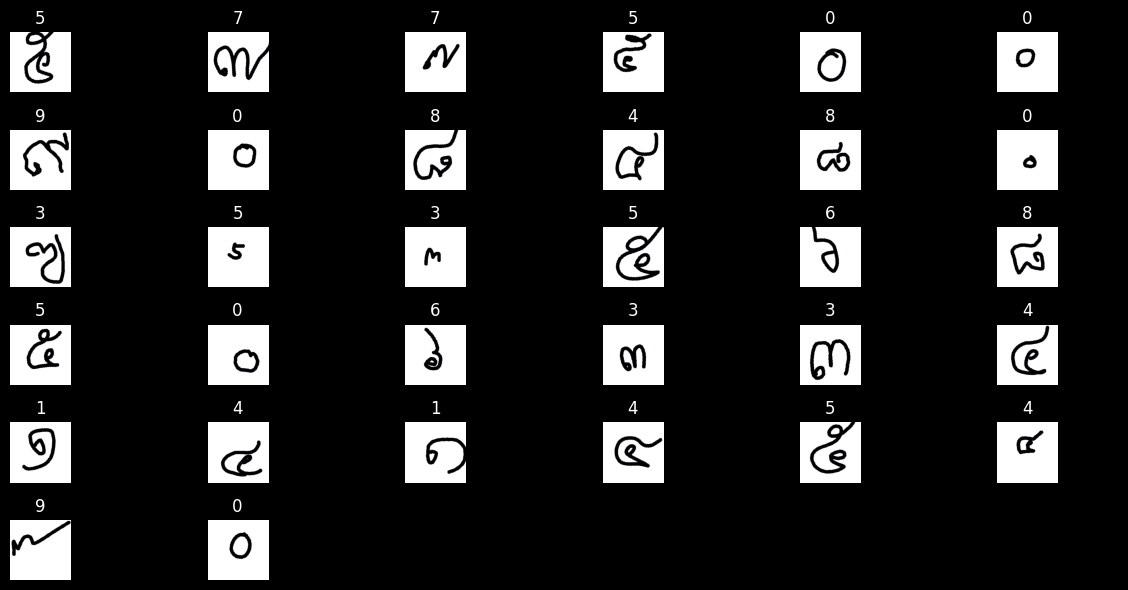

</details>

In [ ]:
### START CODE HERE ###
image_dir = None
train_loader, test_loader = load_data(image_dir)



### END CODE HERE ###

**Create Models**
**customVGG16 (Custom VGG16 Architecture):**
- **Input:** Variable-size input, typically images with multiple channels
- **Architecture:** VGG16 architecture with customizable feature extraction and classification layers
- **Output:** 10 neurons output layer
- **Description:** The customVGG16 model is based on the pretrained VGG16 architecture, a popular convolutional neural network for image classification. It allows customization of feature extraction and classification layers. By default, the pre-trained VGG16 layers are frozen, but specific layers can be made trainable by specifying their indices. Additional convolutional layers can be added to the feature extraction part, followed by ReLU activations. In the classification part, fully connected layers with ReLU activations and dropout are used. The output layer produces 10 class predictions.
<details>
<summary>
<font size="3" color="orange">
<b>Example usage of customVGG16</b>
</font>
</summary>

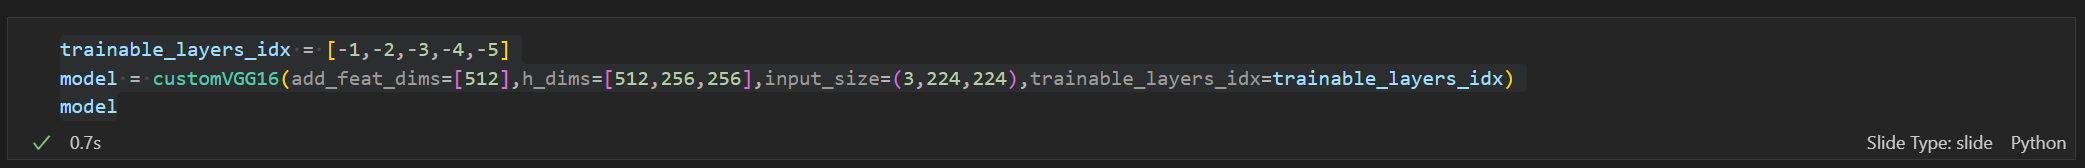
The output should be this :
- ```customVGG16(
  (vgg16): VGG(
    (features): Sequential(
      (0): Sequential(
        (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): ReLU(inplace=True)
        (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (3): ReLU(inplace=True)
        (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (6): ReLU(inplace=True)
        (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (8): ReLU(inplace=True)
        (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (11): ReLU(inplace=True)
        (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (13): ReLU(inplace=True)
        (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (15): ReLU(inplace=True)
        (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (17): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (18): ReLU(inplace=True)
        (19): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (20): ReLU(inplace=True)
        (21): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (22): ReLU(inplace=True)
        (23): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (24): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (25): ReLU(inplace=True)
        (26): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (27): ReLU(inplace=True)
        (28): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (29): ReLU(inplace=True)
        (30): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      )
      (1): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (2): ReLU()
    )
    (avgpool): AdaptiveAvgPool2d(output_size=(7, 7))
    (classifier): Sequential(
      (0): Linear(in_features=25088, out_features=512, bias=True)
      (1): Dropout(p=0.4, inplace=False)
      (2): ReLU()
      (3): Linear(in_features=512, out_features=256, bias=True)
      (4): Dropout(p=0.4, inplace=False)
      (5): ReLU()
      (6): Linear(in_features=256, out_features=256, bias=True)
      (7): Dropout(p=0.4, inplace=False)
      (8): ReLU()
      (9): Linear(in_features=256, out_features=10, bias=True)
    )
  ))

And
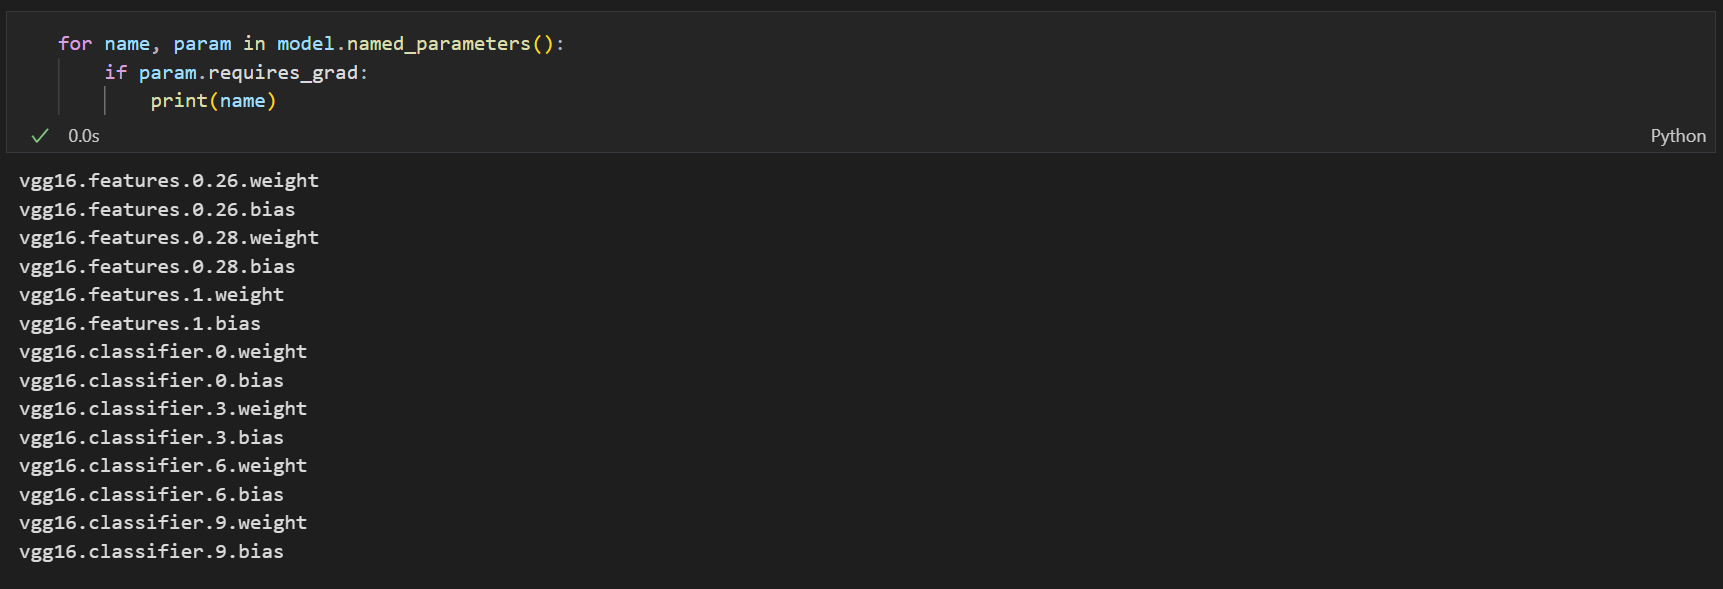
</details>

In [ ]:
class customVGG16(nn.Module):
    def __init__(self,add_feat_dims=None,h_dims=None,input_size=(3,224,224),trainable_layers_idx=None):
        super(customVGG16, self).__init__()
        ### START CODE HERE ###
        self.vgg16 = models.vgg16(pretrained=True)
        self.add_feat_dims = add_feat_dims
        for param in self.vgg16.features[:].parameters():
            param.requires_grad = None

        for param in self.vgg16.classifier.parameters():
            param.requires_grad = None

        if trainable_layers_idx is not None:
            pass

        if self.add_feat_dims is not None:
            features = []
            for i, out_ch in enumerate(add_feat_dims):
                if i == 0:
                    features.append(None)
                else:
                    pass
            self.vgg16.features = nn.Sequential(self.vgg16.features,
                                           *features,
                                           )

        if h_dims is not None:
            input_size_fc1 = self._get_input_size_fc(input_size)
            layers = []
            for i, hdim in enumerate(h_dims):
                if i == 0:
                    layers.append(None)
                else:
                    pass
            self.vgg16.classifier = nn.Sequential(*layers,
                                                nn.Linear(None),
                                                )
        ### END CODE HERE ###

    def _get_input_size_fc(self, input_shape):
        with torch.no_grad():
            ### START CODE HERE ###
            pass

            ### END CODE HERE ###
    
    def forward(self, x):
        ### START CODE HERE ###
        pass

        ### END CODE HERE ###

Complete the `train()` function in the cell below. This function should evaluate the model at every epoch, log the training loss/accuracy, test loss/accuracy, and display the feature map from all layers of the model at every epoch on TensorBoard. Additionally, it should save the model at the last epoch.

Resource : [PyTorch Training loop](<https://pytorch.org/tutorials/beginner/introyt/trainingyt.html#:~:text=%3D0.9)-,The%20Training%20Loop,-Below%2C%20we%20have>), [TensorBoard](https://pytorch.org/docs/stable/tensorboard.html)


In [ ]:
def train(model,opt,loss_fn,train_loader,test_loader,epochs=10,writer=None,checkpoint_path=None,device='cpu'):
    ### START CODE HERE ###
    pass
        
    ### END CODE HERE ###

Let's train your model with 2 epochs to verify that your train() function works properly. After that, we'll move on to the Hyperparameter Grid Search in the next part.

In [ ]:
### START CODE HERE ###


### END CODE HERE ###

---

## **Hyperparameter Grid Search with Raytune**

*If you have access to APEX, I would recommend converting this part into a Python file and submitting the job to run on APEX using SBATCH. This process may take a considerable amount of time.*

You can import additional Ray Tune tools as you want, such as schedulers, search algorithms, etc. Further information on the usage of Ray Tune can be found [here](https://docs.ray.io/en/latest/tune/index.html).

In [ ]:
import ray
from ray import tune
from ray.air import session
from ray.tune.schedulers import ASHAScheduler
from ray.tune.search.optuna import OptunaSearch
from ray.tune.search import ConcurrencyLimiter



In [ ]:
def create_model(model_name,add_feat_dims=None,h_dims=None,input_size=(3,224,224),trainable_layers_idx=None):
    if model_name == 'customVGG16':
        model = customVGG16(add_feat_dims=add_feat_dims,h_dims=h_dims,input_size=input_size,trainable_layers_idx=trainable_layers_idx)
    return model

Complete the `train_raytune()` function below, following the [quick start guide](https://docs.ray.io/en/latest/tune/index.html). This function will be passed to the `tune.Tuner`.

In [ ]:
def train_raytune(config):
    ### START CODE HERE ###
    loss_fn = None
    image_dir = None
    train_loader, test_loader = load_data(image_dir)
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model = None
    model = model.to(device)
    opt = None
    if config['optimizer'] == 'Adam':
        pass
    elif config['optimizer'] == 'SGD':
        pass
    for epoch in range(config['num_epochs']):
        model.train()

        for images, labels in train_loader:
            pass

        
        model.eval()
        for images, labels in test_loader:
            pass

        session.report({
            "train_loss": None,
            "train_accuracy": None,
            "val_loss": None,
            "val_accuracy": None,
        })
    ### END CODE HERE ###

Initialize Ray, define the search space, specify the search algorithm, set up the scheduler, and resources.

Resource : 
- [A Guide To Parallelism and Resources for Ray Tune](https://docs.ray.io/en/latest/tune/tutorials/tune-resources.html#:~:text=A%20Guide%20To%20Parallelism%20and%20Resources%20for%20Ray%20Tune) 
- [Working with Tune Search Spaces](https://docs.ray.io/en/latest/tune/tutorials/tune-search-spaces.html#tune-search-space-tutorial:~:text=Working%20with%20Tune%20Search%20Spaces)
- [How to configure logging in Tune?](https://docs.ray.io/en/latest/tune/tutorials/tune-output.html) 
- [Tune Trial Schedulers (`tune.schedulers`)](https://docs.ray.io/en/latest/tune/api/schedulers.html#tune-scheduler-pbt:~:text=Tune%20Trial...-,Tune%20Trial%20Schedulers%20(tune.schedulers),-%23)

**Search Space:**
- Define a range of configurations for the customVGG16 model, incorporating variations in the number of additional feature dimensions (`add_feat_dims`) and hidden dimensions (`h_dims`). Ensure that ***each of `add_feat_dims` and `h_dims` consists of `None`*** values. ***Include at least 5 different sets*** of configurations. <br>Example :
    - add_feat_dims: `[None,[64,64,64],...]`
    - h_dims: `[None,[512,256,256],...]`
- trainable_layers_idx: `[[-1,-2,-3],[-1,-2,-3,-4,-5],[-1,-2,-3,-4,-5,-6,-7,-8,-9,-10,-11,-12]]`
- lr = `[1e-3, 1e-4, 1e-5,1e-6]`
- batch_size: `[16, 32, 64]`
- num epochs = `[10, 20, 50, 100]`
- opts: `["Adam","SGD"]`

In [ ]:
### START CODE HERE ###
ray.init(num_gpus=1)

models_ls = ["customVGG16"]


config = {
    'model_name': tune.grid_search(models_ls),
    'h_dims': None,
    'add_feat_dims': None,
    'trainable_layers_idx': None, 
    'optimizer': None,
    'lr': None,
    'batch_size': None,
    'num_epochs': None,
}

tuner = tune.Tuner(
    tune.with_resources(train_raytune, resources=None),
    tune_config=tune.TuneConfig(
        metric=None,
        mode=None,
        scheduler=None,
    ),
    param_space=config,
)
result = tuner.fit()
### END CODE HERE ###

Get the report from Grid Search to CSV file.

In [ ]:
print("🎉[INFO] Training is done!")
print("Best config is:", result.get_best_result().config)
print("Best result is:", result.get_best_result())
df = result.get_dataframe()
df.to_csv('/mnt/d/Image_Processing_Bootcamp/Solution/Lab8_hyperparameter-tuning/csv_results/cnn.csv', index=False)

ray.shutdown()

---

Train both the customVGG16 models using the best hyperparameter set obtained from the grid search.

In [ ]:
image_dir = '/mnt/d/Image_Processing_Bootcamp/Dataset/thai-handwriting-number-master/thai-handwriting-number-master/data/raw/thai-handwriting-number.appspot.com'
train_loader, test_loader = load_data(image_dir)

In [ ]:
trainable_layers_idx = [-1,-2,-3,-4,-5]
model = customVGG16(add_feat_dims=None,h_dims=[512,256,256],input_size=(3,224,224),trainable_layers_idx=trainable_layers_idx)
opt = torch.optim.Adam(model.parameters(), lr=0.0001)
loss_fn = nn.CrossEntropyLoss()
model

In [ ]:
writer = SummaryWriter('runs/customVGG16')

train(model.cuda(),opt,loss_fn,train_loader,test_loader,epochs=10,writer=writer,device='cuda')


Use the `FeatureExtractor()` class and `visualize_feature_map()` function to visualize the feature map of ***ALL*** layers of the Convolution Feature Extractor part. Then, save it as an image.
<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- layer name : vgg16.features.0<br>


- layer name : features.1<br>

- and so on . . . 
</details>

In [ ]:
class FeatureExtractor(nn.Module):
    def __init__(self, model, target_layers):
        super(FeatureExtractor, self).__init__()
        self.model = model
        self.target_layers = target_layers
        self.features = []

        for layer_name, layer in self.model.named_modules():
            if layer_name in target_layers:
                print(layer_name)
                layer.register_forward_hook(self.save_feature(layer_name))

    def save_feature(self, layer_name):
        def hook(module, input, output):
            self.features.append(output.clone())
        return hook

    def forward(self, x):
        self.features = [] 
        self.model(x)  
        return self.features 

In [ ]:
def visualize_feature_map(x,base_filename):
    ### START CODE HERE ###
    
    pass

    ### END CODE HERE ###


In [ ]:
### START CODE HERE ###
layer_names = []
for layer_name, layer in model.named_modules():
    pass




### END CODE HERE ###

Display the confusion matrix and Classification Report for both models 

<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical
This is just an example of CNN. You should have 2 model : MLP, CNN.
```
              precision    recall  f1-score   support

           0       0.62      0.90      0.74        81
           1       0.88      0.94      0.91        84
           2       0.93      0.89      0.91        84
           3       0.94      0.91      0.93        70
           4       0.95      0.83      0.89        72
           5       0.97      0.91      0.94        74
           6       0.96      0.88      0.92        81
           7       0.93      0.83      0.88        83
           8       0.96      0.89      0.93        76
           9       0.91      0.89      0.90        72

    accuracy                           0.89       777
   macro avg       0.91      0.89      0.89       777
weighted avg       0.90      0.89      0.89       777
```

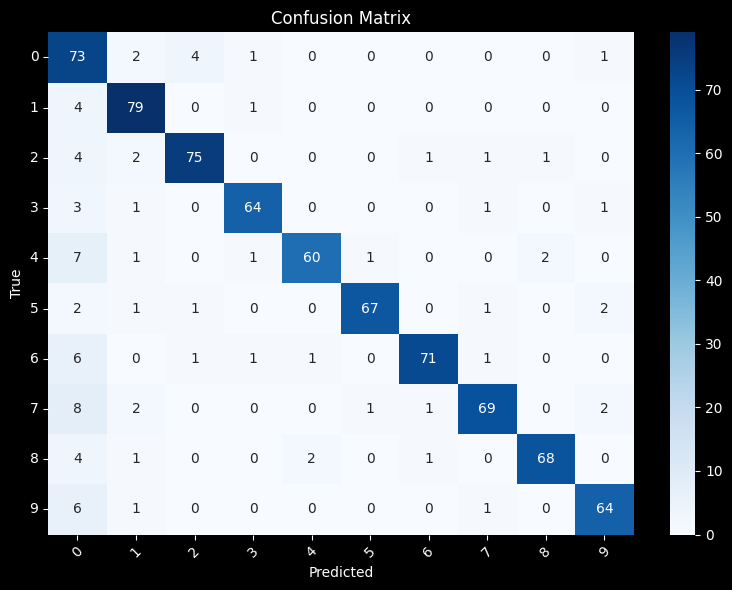

</details>

In [ ]:
def load_model(model,model_path):
    ### START CODE HERE ###


    ### END CODE HERE ###
    return model


### START CODE HERE ###





### END CODE HERE ###


Questions
1. Should we freeze the weights of all pre-trained layers or only a subset during training? How does this impact the model's ability to learn task-specific features while preventing overfitting on the transferred knowledge?
2. Explain how early stopping works.
3. Are there any circumstances where using early stopping wouldn't be recommended? If so, why not? 
4. Does changing the batch size influence training efficiency and model performance? If so, what is the ideal batch size for this specific dataset and computational resources?
5. Considering the class imbalance in the dataset (if present), how can we adjust hyperparameters like class weights or oversampling techniques to improve the model's performance?


